In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

## Initial Cleaning: Taking care of missing values


In [3]:
col_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

education2 = education.copy() 

for col in col_list:
    education2.loc[:, col] = education2.groupby('STATE').transform(lambda x: x.fillna(x.mean()))
    
for col in col_list:
    education2.loc[:, col] = education2.loc[:, col].fillna(education2.loc[:, col].mean())
        
print((education2.isnull().sum()/education2.isnull().count())*100)

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [4]:
education2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.160580e+05,9.092664e+06,7.664310e+05,4.216914e+06,4.109319e+06,9.197265e+06,4.763269e+06,2.680485e+06,4.292705e+05,...,63920.470186,63649.323593,53742.326058,5.142279e+05,2.446825e+05,7.947983e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.005701e+06,1.106024e+07,1.076284e+06,5.220854e+06,5.163003e+06,1.128030e+07,5.926444e+06,3.157737e+06,5.023493e+05,...,80027.568044,78646.031831,67566.267860,6.415325e+05,3.065506e+05,9.623289e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.870410e+05,2.422636e+06,2.081370e+05,1.319451e+06,8.765120e+05,2.419590e+06,1.302379e+06,7.349388e+05,1.201725e+05,...,13336.500000,12989.250000,10748.406250,1.072088e+05,4.992725e+04,1.769522e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,7.362482e+05,6.055223e+06,4.880957e+05,2.956335e+06,2.494314e+06,6.161170e+06,3.153096e+06,1.832252e+06,3.301260e+05,...,42767.000000,42993.500000,36585.000000,3.422030e+05,1.618015e+05,5.636270e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,9.631825e+05,9.684328e+06,7.732208e+05,4.444259e+06,4.118835e+06,9.780398e+06,5.152055e+06,2.872585e+06,4.792252e+05,...,75201.500000,75501.500000,67372.000000,6.068028e+05,2.894372e+05,9.107612e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


Although it is hard to really find anything noticeable by just looking at the numbers, one thing I noticed was that total expenditures exceed total revenue on average. Another thing that I noticed was that the standard deviations seem to be very high for all columns which seems to indicate that there is a lot of variance in the data. This may make sense however since it is grouped by state and year. 

### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

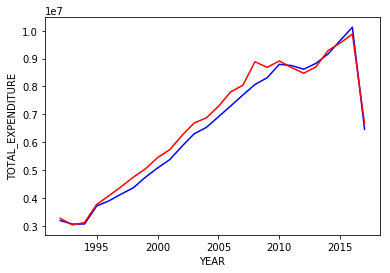

In [11]:
sns.lineplot(x = 'YEAR', y = 'TOTAL_REVENUE', data = education2.loc[education2['STATE'] == "COLORADO"], color = 'blue')
sns.lineplot(x = 'YEAR', y = 'TOTAL_EXPENDITURE', data = education2.loc[education2['STATE'] == "COLORADO"], color = 'red')

Both revenue and expenditure seem to be increasing at around the same pace up until 2016 which seems to be expected. However, there is a sharp dropoff between 2016 to 2017. I wasn't able to find any information on why this occurred but it is strange that it happened shortly after marijuana was legalized (2014). Revenue from marijuana tax was supposed to go to educational funding so you would think that there would be an opposite effect. 

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [34]:
CO = education2.loc[education2['STATE'] == "COLORADO"]
print('Average math score for fourth graders in Colorado ', CO['AVG_MATH_4_SCORE'].mean())
print('Average reading score for fourth graders in Colorado ', CO['AVG_READING_4_SCORE'].mean())
print('Average math score for eigth graders in Colorado ', CO['AVG_MATH_8_SCORE'].mean())
print('Average reading score for eigth graders in Colorado ', CO['AVG_READING_8_SCORE'].mean())

Average math score for fourth graders in Colorado  237.82670048293502
Average reading score for fourth graders in Colorado  223.06924459055077
Average math score for eigth graders in Colorado  283.90075558846564
Average reading score for eigth graders in Colorado  262.67550169110314


In Colorado, both 4th and 8th graders score better on average in math than on reading 

### 4. What are the distributions of the math and reading scores in the sample?

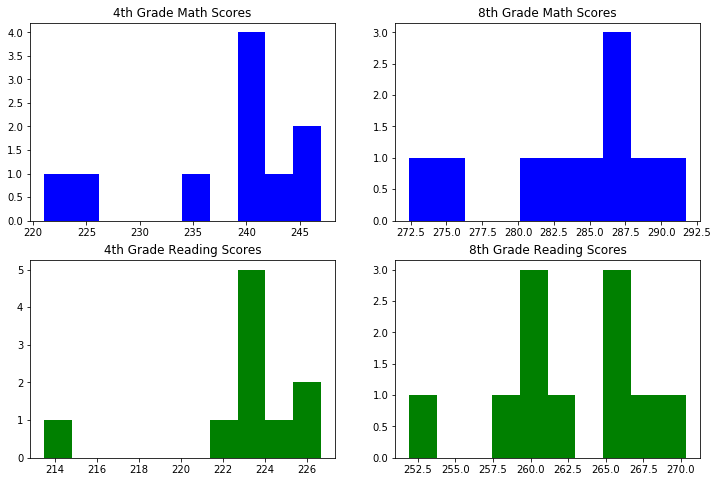

In [32]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
plt.hist(CO['AVG_MATH_4_SCORE'], color = 'blue')
plt.title('4th Grade Math Scores')

plt.subplot(2, 2, 2)
plt.hist(CO['AVG_MATH_8_SCORE'], color = 'blue')
plt.title('8th Grade Math Scores')

plt.subplot(2, 2, 3)
plt.hist(CO['AVG_READING_4_SCORE'], color = 'green')
plt.title('4th Grade Reading Scores')

plt.subplot(2, 2, 4)
plt.hist(CO['AVG_READING_8_SCORE'], color = 'green')
plt.title('8th Grade Reading Scores')

plt.show()

### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [39]:
## mean method
score_list = ["AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]

CO_mean = CO.copy()

for col in score_list:
    CO_mean.loc[:, col] = CO_mean.loc[:, col].fillna(CO_mean.loc[:, col].mean())

In [40]:
## median method
CO_median = CO.copy()

for col in score_list:
    CO_median.loc[:, col] = CO_median.loc[:, col].fillna(CO_median.loc[:, col].median())

In [41]:
## interpolation method
CO_int = CO.copy()

for col in score_list:
    CO_int.loc[:, col] = CO_int.loc[:, col].fillna(CO_int.loc[:, col].interpolate(limit_direction = 'both'))

DISTRIBUTIONS USING MEAN METHOD TO FILL IN MISSING VALUES


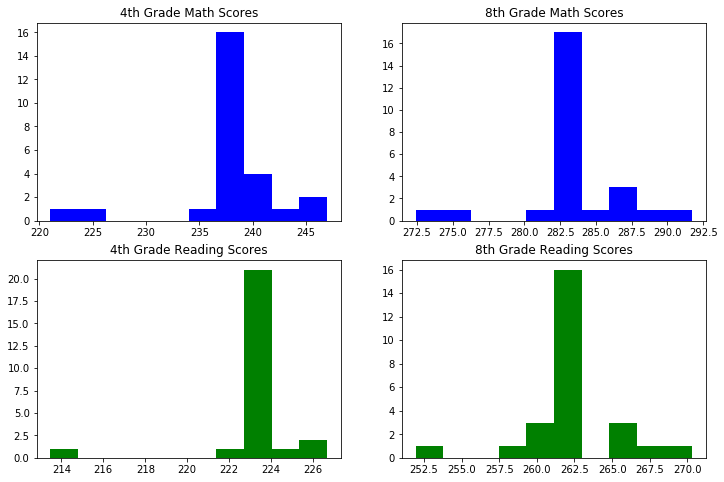

In [37]:
print("DISTRIBUTIONS USING MEAN METHOD TO FILL IN MISSING VALUES")

plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
plt.hist(CO_mean['AVG_MATH_4_SCORE'], color = 'blue')
plt.title('4th Grade Math Scores')

plt.subplot(2, 2, 2)
plt.hist(CO_mean['AVG_MATH_8_SCORE'], color = 'blue')
plt.title('8th Grade Math Scores')

plt.subplot(2, 2, 3)
plt.hist(CO_mean['AVG_READING_4_SCORE'], color = 'green')
plt.title('4th Grade Reading Scores')

plt.subplot(2, 2, 4)
plt.hist(CO_mean['AVG_READING_8_SCORE'], color = 'green')
plt.title('8th Grade Reading Scores')

plt.show()

DISTRIBUTIONS USING MEDIAN METHOD TO FILL IN MISSING VALUES


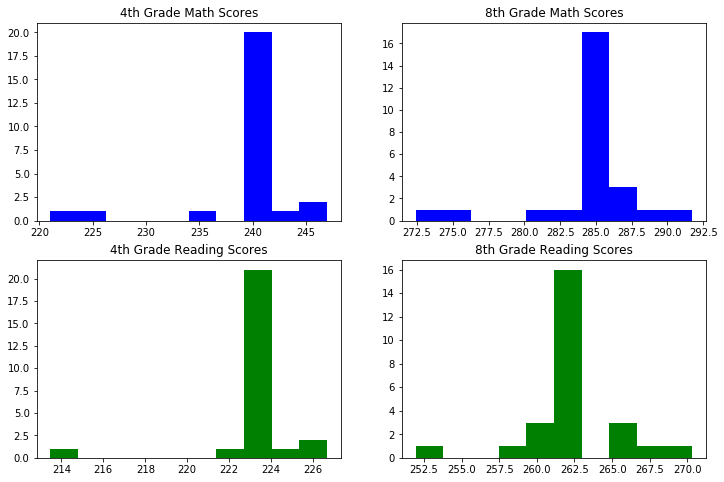

In [43]:
print("DISTRIBUTIONS USING MEDIAN METHOD TO FILL IN MISSING VALUES")

plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
plt.hist(CO_median['AVG_MATH_4_SCORE'], color = 'blue')
plt.title('4th Grade Math Scores')

plt.subplot(2, 2, 2)
plt.hist(CO_median['AVG_MATH_8_SCORE'], color = 'blue')
plt.title('8th Grade Math Scores')

plt.subplot(2, 2, 3)
plt.hist(CO_median['AVG_READING_4_SCORE'], color = 'green')
plt.title('4th Grade Reading Scores')

plt.subplot(2, 2, 4)
plt.hist(CO_median['AVG_READING_8_SCORE'], color = 'green')
plt.title('8th Grade Reading Scores')

plt.show()

DISTRIBUTIONS USING INTERPOLATION METHOD TO FILL IN MISSING VALUES


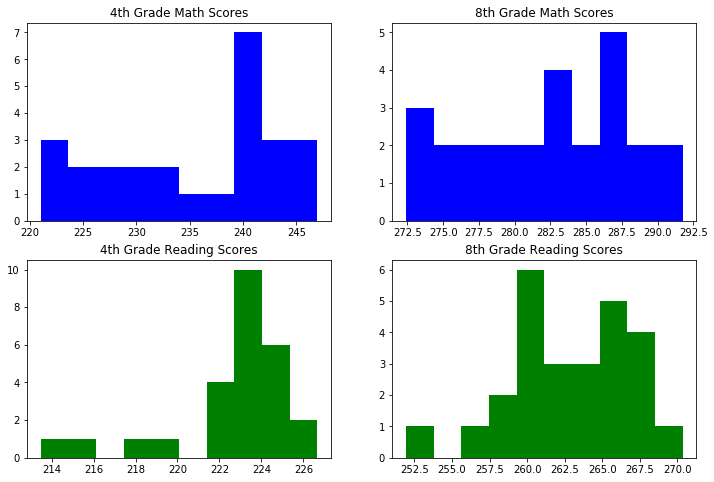

In [42]:
print("DISTRIBUTIONS USING INTERPOLATION METHOD TO FILL IN MISSING VALUES")

plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
plt.hist(CO_int['AVG_MATH_4_SCORE'], color = 'blue')
plt.title('4th Grade Math Scores')

plt.subplot(2, 2, 2)
plt.hist(CO_int['AVG_MATH_8_SCORE'], color = 'blue')
plt.title('8th Grade Math Scores')

plt.subplot(2, 2, 3)
plt.hist(CO_int['AVG_READING_4_SCORE'], color = 'green')
plt.title('4th Grade Reading Scores')

plt.subplot(2, 2, 4)
plt.hist(CO_int['AVG_READING_8_SCORE'], color = 'green')
plt.title('8th Grade Reading Scores')

plt.show()

Since there are so many missing values, both the mean and median methods of filling in for missing values result in plots with huge spikes where those values are located. The interpolation method does a better job at spreading out the values and looks closer to the original plots. With so much missing information though it would be difficult to trust any of the above methods to accurately depict the missing data. 